# LR Keras Model with Normalization

In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# read in the dataset
df = pd.read_csv("concrete_data.csv")

In [6]:
# create label and features
label = df.pop("Strength")
df.pop("Age")
features = df.copy()

In [13]:
# normalize the data
stats = features.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.0,192.375,272.9,350.00,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.0,0.000,22.0,142.95,359.4
Fly Ash,1030.0,54.188350,63.997004,0.0,0.000,0.0,118.30,200.1
Water,1030.0,181.567282,21.354219,121.8,164.900,185.0,192.00,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.0,0.000,6.4,10.20,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.0,932.000,968.0,1029.40,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.0,730.950,779.5,824.00,992.6


In [15]:
features = (features - stats["mean"]) / stats["std"]

In [16]:
features.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
count,1.030000e+03,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-4.139084e-16,-1.793603e-16,0.000000,-1.379695e-16,-1.931572e-16,7.243397e-16,-4.759946e-16
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714421e+00,-8.564718e-01,-0.846733,-2.798851e+00,-1.038638e+00,-2.211064e+00,-2.239829e+00
25%,-8.496407e-01,-8.564718e-01,-0.846733,-7.805147e-01,-1.038638e+00,-5.262618e-01,-5.317114e-01
50%,-7.911350e-02,-6.014861e-01,-0.846733,1.607513e-01,3.269920e-02,-6.326279e-02,7.383152e-02
75%,6.586406e-01,8.003558e-01,1.001791,4.885554e-01,6.688058e-01,7.264077e-01,6.288606e-01
max,2.476712e+00,3.309068e+00,2.279976,3.064159e+00,4.351528e+00,2.213149e+00,2.731735e+00


### Train Same LR Model for 50 Times and 50 Epochs Each

In [21]:
mse_list = []

for i in range(50):

    print("Round:", i)
    x_train, x_test, y_train, y_test = train_test_split(features, label, train_size=0.7)

    model = Sequential([
        keras.layers.Dense(10, input_shape=(7,), activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(x_train, y_train, epochs=50, verbose=0)

    preds = model.predict(x_test)
    mse_list.append(mean_squared_error(y_test, preds))



Round: 0
Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49


### Evaluate Model and Average of 50 MSEs

In [22]:
np.mean(mse_list), np.std(mse_list)

(397.66605365995747, 122.04516204919867)

In [23]:
import matplotlib.pyplot as plt

(array([11., 15., 13.,  4.,  1.,  0.,  2.,  1.,  1.,  2.]),
 array([266.31552954, 317.49214057, 368.66875161, 419.84536265,
        471.02197368, 522.19858472, 573.37519576, 624.55180679,
        675.72841783, 726.90502887, 778.0816399 ]),
 <a list of 10 Patch objects>)

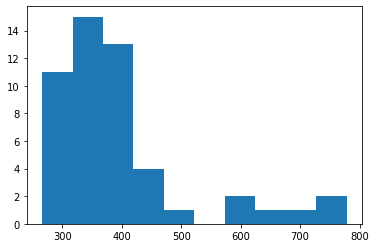

In [24]:
plt.hist(mse_list)

When compared to our previous non-normalized baseline model, we can see that we have reduced our variation as reflected in the lower standard deviation of the list of MSEs. The average MSE is a bit more centered around the 200 to 400 range.  